# Saturation excess process

basato sui notebook di Niccolò Tubini e Riccardo Rigon.

Autori: Niccolò Schiavi Cappello, Marco Feltrin, Alessandro Lagrecacolonna

## Introduzione

In questo notebook si vuole analizzare il processo di saturazione dal basso, per far questo si è preso un suolo con uno strato di 0.75 m di sabbia confinante inferiormente con uno strato di terreno argilloso dello spessore di 3.25 m.

Successivamente si è creato un file contenente delle precipitazioni create ad hoc affinchè possa verificarsi il fenomeno di saturazione dal basso.

In tutta l'analisi si è trascurato l'effetto della temperatura sul processo di infiltrazione.

In [1]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')


project_path = os.path.dirname(os.getcwd())


grid_input_file_name = project_path + "/WETGEO/Grid_input/ex2955_grid_4.csv"        #griglia con le informazioni sullo strato e la sua discretizzazione

ic_input_file_name = project_path + "/WETGEO/Grid_input/ex2955_ic_4.csv"            #condizioni iniziali

parameter_input_file_name = project_path + "/WETGEO/Grid_input/Richards_VG.csv"     #import dei parametri delle curve di ritenzione idrica

dictionary_input_file_name = project_path + "/WETGEO/Grid_input/dictionary.csv"     #dizionario con le informazioni sui suoli

grid_type = 'classical'                                                             #griglia classica con elementi tutti uguali tra loro

dz_min = -9999       # not required for grid_type = 'classical'

dz_max = -9999      # not required for grid_type = 'classical'

b = -9999           # not required for grid_type = 'classical'

psi_interp_model = "linear"       #interpolazione della suzione lineare

T_interp_model = "linear"         #interpolazione della temperatura lineare

water_ponding_0 = -5.0            #suzione sul piano di campagna

T_water_ponding_0 = 273.15

output_file_name =  project_path + "/WETGEO/Grid_NetCDF/ex2955_grid_4.nc"

output_title = '''Computational grid for saturation excess.
                  '''
output_summary = '''

'''

output_date = ''

output_institution = 'GEOframe'

## Creazione della griglia NetCDF:

In [2]:
data_grid = pd.read_csv(grid_input_file_name)

data_ic = pd.read_csv(ic_input_file_name)

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=True)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, water_ponding_0=water_ponding_0, T_water_ponding_0=T_water_ponding_0, shallow_water=True)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:\Users\nicco\Desktop/WETGEO/Grid_NetCDF/ex2955_grid_4.nc


## Post-processing  

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
from geoframepy.timeseries import io_csv
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,          #False se non si ha installato LaTEX
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 16,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

plt.rcParams.update(nice_fonts)

## Output file

In [43]:
ds = xr.open_dataset(project_path + '/output/ex2955_4_0000.nc')
ds

<xarray.Dataset>
Dimensions:           (depth: 301, dualDepth: 301, time: 433)
Coordinates:
  * depth             (depth) float64 -2.993 -2.978 -2.963 ... -0.0025 0.0
  * dualDepth         (dualDepth) float64 -3.0 -2.985 -2.97 ... -0.01 -0.005 0.0
  * time              (time) datetime64[ns] 2019-11-13 ... 2019-11-19
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex04.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:\Users\nicco\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\nicco\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\nicco\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

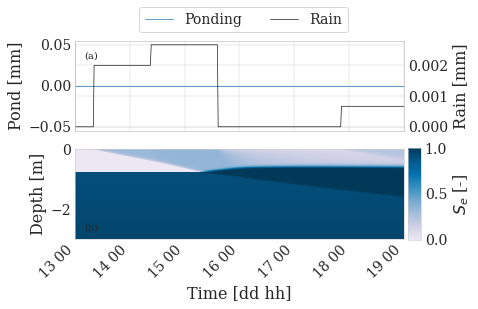

In [44]:
line_w = 0.7

start_date = '2019-11-13 00:00'
end_date = '2019-11-19 00:00'

plot_width = 15/2.54

fig, ax = plt.subplots(2, 1, sharex='col', gridspec_kw={'height_ratios': [1,1]},figsize=(plot_width,plot_width/1.618))

lns1 = ax[0].plot(ds.time.sel(time=slice(start_date, end_date)).values, ds.waterVolume.sel(depth=0).sel(time=slice(start_date,end_date))*1000, label='Ponding', color='#1f78b4', linewidth=line_w)

ax0twin = ax[0].twinx()
lns2 = ax0twin.plot(ds.time.sel(time=slice(start_date, end_date)).values, ds.topBC.sel(time=slice(start_date,end_date))/300, label='Rain', linewidth=line_w, color='0.1')

ax0twin.set_ylabel('Rain [mm]')
ax[0].set_ylabel('Pond [mm]')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax[0].legend(lns, labs, bbox_to_anchor=(0.85,1.45) , ncol=2)


norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
im = ds.saturationDegree.where(ds.depth<0.0).sel(time=slice(start_date, end_date)).plot(ax=ax[1], y='depth', add_colorbar=False, cmap=my_cmap, norm=norm)
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh]')

cbaxes = fig.add_axes([0.91, 0.122, 0.03, 0.35]) 
cbar = fig.colorbar(im, ax=ax[1],orientation="vertical",fraction=0.07, pad=0.1, cax=cbaxes, label='$S_e$ [-]')

ax[0].axvline(x=ds.time.sel(time='2019-11-13 00:00').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')
ax[0].axvline(x=ds.time.sel(time='2019-11-19 00:00').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')

ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
ax[1].xaxis.set_tick_params(rotation=45)

plt.text( 0.03,0.8, '(a)', fontsize=10,
             transform=ax[0].transAxes)
plt.text( 0.03,0.1, '(b)', fontsize=10,
             transform=ax[1].transAxes)


plt.show()

In [24]:
ds_deep = xr.open_dataset(project_path + '/output/ex2955_4_0000.nc')
# ds

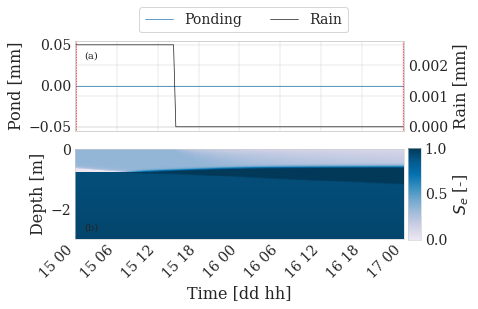

In [45]:
line_w = 0.7

start_date = '2019-11-15 00:00'
end_date = '2019-11-17 00:00'

plot_width = 15/2.54

fig, ax = plt.subplots(2, 1, sharex='col', gridspec_kw={'height_ratios': [1,1]},figsize=(plot_width,plot_width/1.618))

lns1 = ax[0].plot(ds_deep.time.sel(time=slice(start_date, end_date)).values, ds_deep.waterVolume.sel(depth=0).sel(time=slice(start_date,end_date))*1000, label='Ponding', color='#1f78b4', linewidth=line_w)

ax0twin = ax[0].twinx()
lns2 = ax0twin.plot(ds_deep.time.sel(time=slice(start_date, end_date)).values, ds_deep.topBC.sel(time=slice(start_date,end_date))/300, label='Rain', linewidth=line_w, color='0.1')

ax0twin.set_ylabel('Rain [mm]')
ax[0].set_ylabel('Pond [mm]')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax[0].legend(lns, labs, bbox_to_anchor=(0.85,1.45) , ncol=2)


norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
im = ds_deep.saturationDegree.where(ds_deep.depth<0.0).sel(time=slice(start_date, end_date)).plot(ax=ax[1], y='depth', add_colorbar=False, cmap=my_cmap, norm=norm)
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh]')

cbaxes = fig.add_axes([0.91, 0.122, 0.03, 0.35]) 
cbar = fig.colorbar(im, ax=ax[1],orientation="vertical",fraction=0.07, pad=0.1, cax=cbaxes, label='$S_e$ [-]')

ax[0].axvline(x=ds_deep.time.sel(time='2019-11-15 00:00').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')
ax[0].axvline(x=ds_deep.time.sel(time='2019-11-17 00:00').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')

ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
ax[1].xaxis.set_tick_params(rotation=45)

plt.text( 0.03,0.8, '(a)', fontsize=10,
             transform=ax[0].transAxes)
plt.text( 0.03,0.1, '(b)', fontsize=10,
             transform=ax[1].transAxes)


plt.show()